In [2]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Review

- Slides and at https://pollev.com/jeremysanchez

You do not need to worry about the working of these functions. 

In [3]:
def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='#1e90ff'):
    y = x*slope + intercept
    plots.plot(x, y, color=color, lw=3)
    
def draw_vertical_line(x_position, color='black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plots.plot(x, y, color=color, lw=3)
    
def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def r_scatter(r):
    """Generate a scatter plot with a correlation approximately r"""
    plots.figure(figsize=(5,5))
    x, y = make_correlated_data(r)
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    
def r_table(r):
    """
    Generate a table of 1000 data points with a correlation approximately r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

## New material

In [4]:
families = Table.read_table('family_heights.csv')
families.where('family','1')

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female


In [5]:
parent_avgs = (families.column('father') + families.column('mother'))/2

In [6]:
heights = Table().with_columns(
    'Family', families.column('family'),
    'Parent Average', parent_avgs,
    'Child', families.column('child'),
)

In [7]:
heights.where('Family', '1')

Family,Parent Average,Child
1,72.75,73.2
1,72.75,69.2
1,72.75,69
1,72.75,69


Note: Child heights are the **adult** heights of children in a family.

In [8]:
def nn_prediction_height(p_avg):
    """Predict the height of a child whose parents have a parent average height of p_avg.
    
    The prediction is the average height of the children whose parent average height is
    in the range p_avg plus or minus 0.25.
    """
    
    close_points = heights.where('Parent Average', are.between(p_avg-1/4, p_avg + 1/4))
    return np.average(close_points.column('Child')) 

In [10]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

In [11]:
def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)

### Where is the prediction line?

#### $r$ = 0

In [17]:
example = r_table(0)
example

x,y
0.0912047,-1.12219
1.09128,-0.25849
-1.94697,0.314316
-1.38635,0.182474
-2.29649,0.880401
2.40983,1.49246
1.72784,0.356787
2.20456,2.91201
0.794828,-0.0611818
0.976421,1.52217


In [12]:
def nn_prediction_example(x_val):
    """ Predicts y-value for x based on the example table """
    neighbors = example.where('x', are.between(x_val - 1/4, x_val + 1/4))
    return np.mean(neighbors.column('y'))

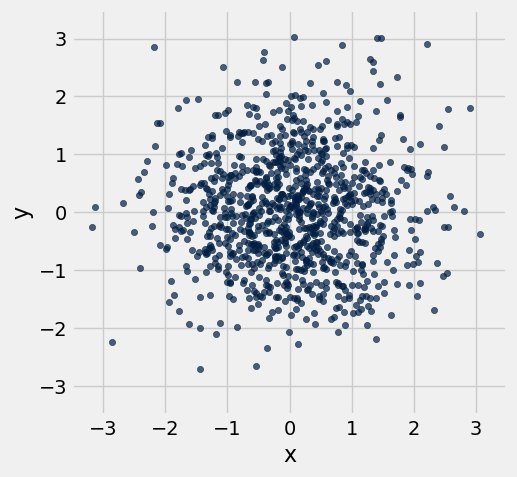

In [13]:
example = r_table(0)
example.scatter('x', 'y')
resize_window()

In [14]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

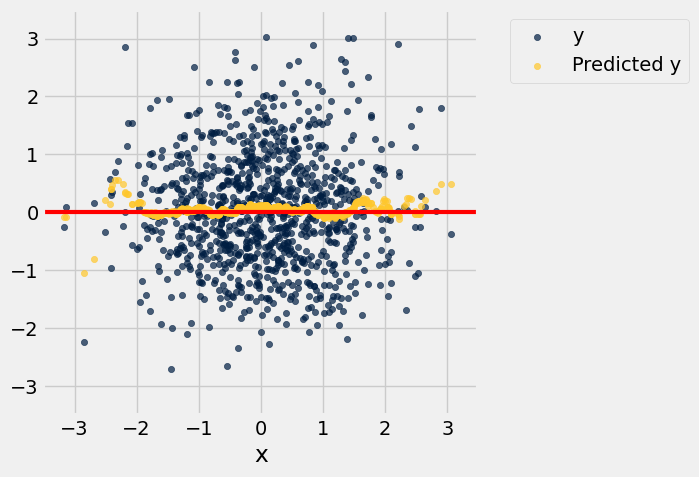

In [15]:
example.scatter('x')
draw_line(slope = 0, color = 'red')
resize_window()

#### $r$ = 0.99

In [16]:
example = r_table(0.99)

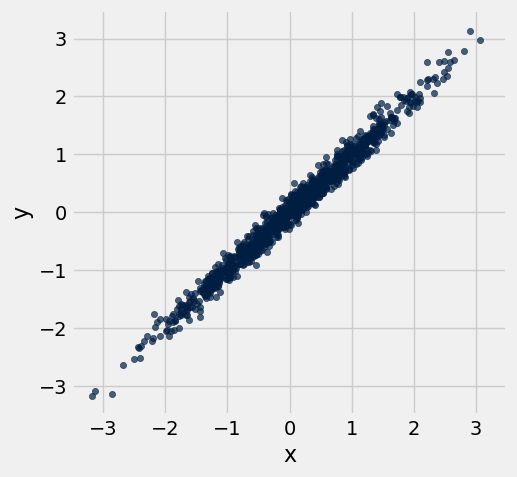

In [17]:
example.scatter('x', 'y')
resize_window()

In [18]:
def nn_prediction_example(x_val):
    """ Predicts y-value for x based on the example table """
    neighbors = example.where('x', are.between(x_val - .25, x_val + .25))
    return np.mean(neighbors.column('y'))   

In [19]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

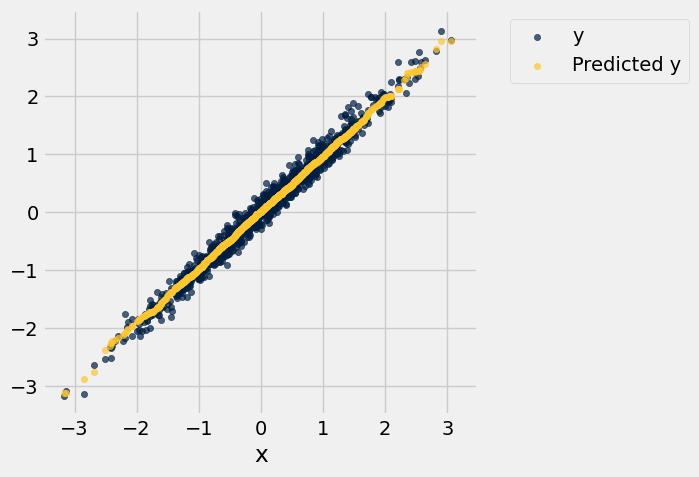

In [20]:
example.scatter('x')
resize_window()

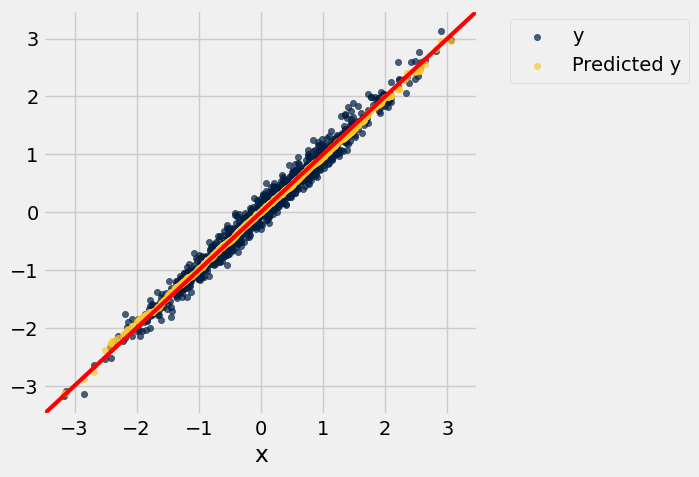

In [21]:
example.scatter('x')
draw_line(slope=1, color = 'red')
resize_window()

#### $r$ = 0.5

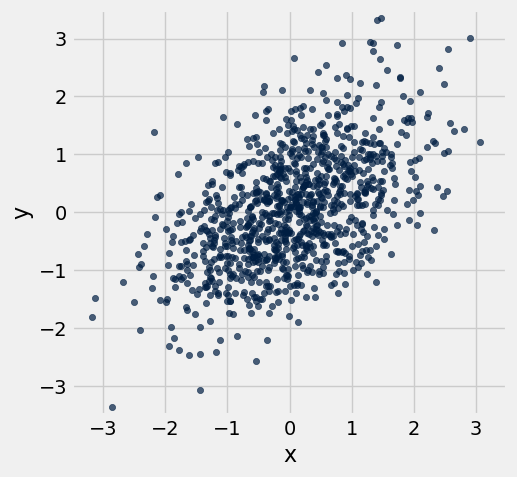

In [22]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()

______

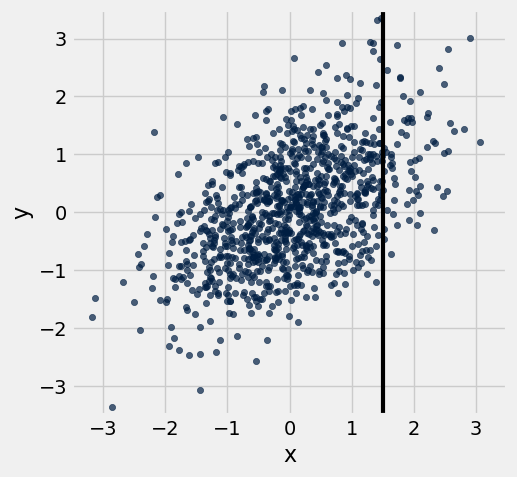

In [23]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()

### A line at x = 1.5
draw_vertical_line(1.5)

Now superimposing a line with slope $1$ at $x = 1.5$

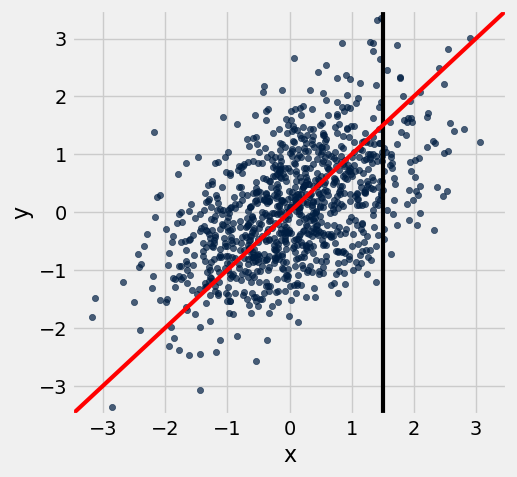

In [24]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()


draw_vertical_line(1.5)
draw_line(slope=1, intercept=0, color='red')

Now superimposing the graph of averages:

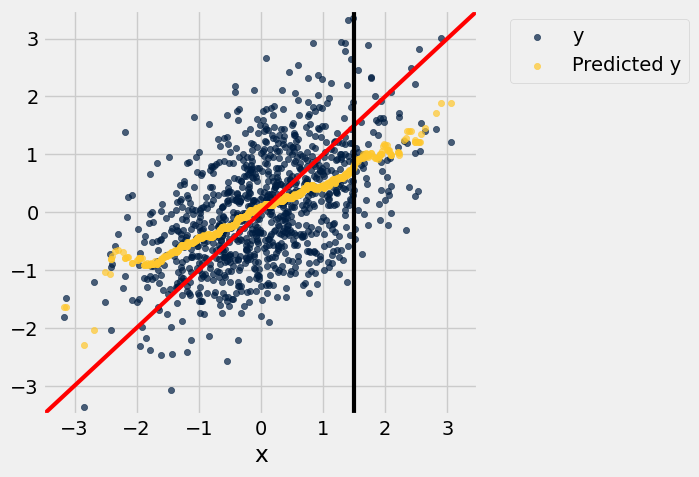

In [25]:
example = example.with_column('Predicted y', example.apply(nn_prediction_example, 'x'))
example.scatter('x')
draw_line(slope=1, color='red')
draw_vertical_line(1.5)
resize_window()

Now superimposing a line with slope $ = 0.5$:

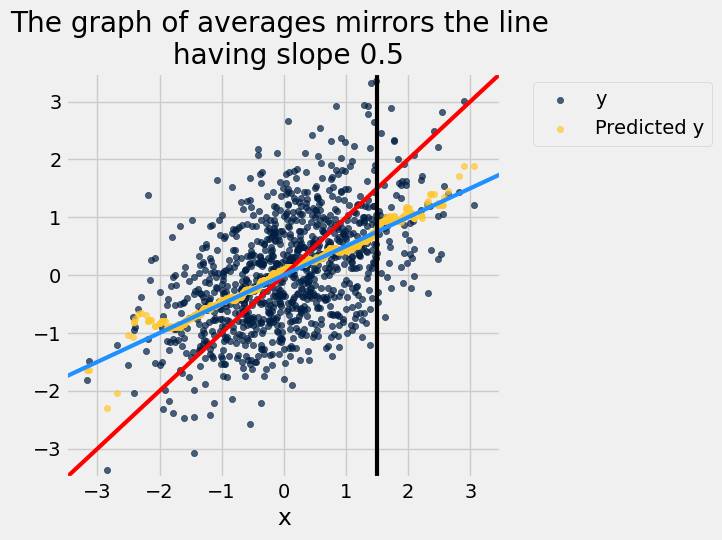

In [26]:
example.scatter('x')
draw_line(slope=1, intercept=0, color='red')
draw_line(slope=0.5, intercept=0)
draw_vertical_line(1.5)
plots.title('The graph of averages mirrors the line \n having slope 0.5')
resize_window()

#### $r$ = 0.7

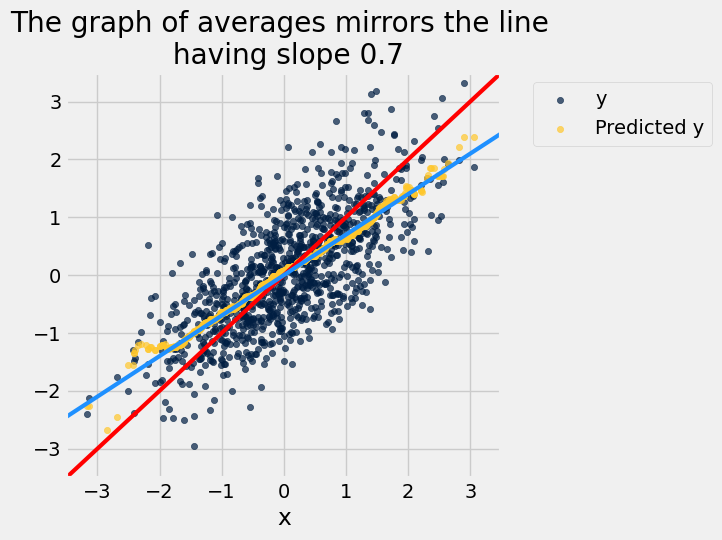

In [27]:
example = r_table(0.7)
example = example.with_column('Predicted y', example.apply(nn_prediction_example, 'x'))
example.scatter('x')
draw_line(slope=1, intercept=0, color='red')
draw_line(slope=0.7, intercept=0, color='dodgerblue')
plots.title('The graph of averages mirrors the line \n having slope 0.7')
resize_window()

**STOP**

### Defining the linear regression line in standard units

In [ ]:
def slope(t, x, y):
    """Computes the slope of the regression line"""
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

In [ ]:
def intercept(t, x, y):
    """Computes the intercept of the regression line"""
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

In [ ]:
example = r_table(0.5)
slope(example, 'x', 'y')

_____

In [ ]:
heights_with_predictions = heights.with_column(
    'Nearest neighbor prediction', 
    heights.apply(nn_prediction_height, 'Parent Average'))
heights_with_predictions.show(5)

In [ ]:
heights_with_predictions.scatter('Parent Average')

In [ ]:
predicted_heights_slope = slope(heights, 'Parent Average', 'Child')
predicted_heights_intercept = intercept(heights, 'Parent Average', 'Child')
[predicted_heights_slope, predicted_heights_intercept]

In [ ]:
heights_with_predictions = heights_with_predictions.with_column(
    'Regression Prediction', 
    predicted_heights_slope*heights.column('Parent Average') + predicted_heights_intercept
)
heights_with_predictions

In [ ]:
heights_with_predictions.scatter('Parent Average')

#### Discussion Question: Can you predict students' final scores?

In [28]:
# x variable: midterm scores
midterm_mean = 70
midterm_sd = 10

# y variable: final scores
final_mean = 50
final_sd = 12

# Correlation (relates x to y values)
corr = 0.75

# new observation's x value
midterm_student = 90



In [29]:
midterm_student_su = (midterm_student - midterm_mean) / midterm_sd
midterm_student_su

2.0

In [30]:
final_student_su = midterm_student_su * corr
final_student_su

1.5

In [31]:
final_student = final_student_su * final_sd + final_mean
final_student

68.0